<a href="https://colab.research.google.com/github/inuwamobarak/african_attire_dictator/blob/main/African_Local_Attire_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For AV

In [ ]:
#Importing Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf #major backend

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Mounting Google Drive for dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Dataset directory loading
import pathlib
data_dir = "/content/drive/MyDrive/MLProjects/dataset/african_attires"
data_dir_train = "/content/drive/MyDrive/MLProjects/dataset/african_attires/Train"
data_dir_validation = "/content/drive/MyDrive/MLProjects/dataset/african_attires/Validation"

Data Cleaning

In [ ]:
import cv2 #major backend for data cleaning
#Helper function for data cleaning
def check_images(s_dir, ext_list):
    bad_images=[] #empty array for storing bad images
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                        image_contents = tf.io.read_file(f_path)
                        image = tf.image.decode_jpeg(image_contents, channels=3)
                    except Exception as e:
                        print('file ', f_path, ' is not a valid image file')
                        print(e)
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

In [ ]:
#Calling the helper function
source_dir = data_dir_train
good_exts=["bmp", "gif", "jpeg", "png","jpg"] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')

print(bad_file_list)
print(bad_ext_list)

processing class directory  Idoma
processing class directory  Zulu
processing class directory  Tswana-Shweshwe
processing class directory  Tiv
processing class directory  Igala
processing class directory  Idgo
processing class directory  Adire
processing class directory  Xhosa-South Africa
[]
[]


Data Image Preprocessing

In [ ]:
img_height,img_width=180,180 #setting image dimention
batch_size=32

In [ ]:
#for train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9784 files belonging to 8 classes.


In [ ]:
#for validation datset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_validation,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2579 files belonging to 8 classes.


Data Visualization

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Adire', 'Idgo', 'Idoma', 'Igala', 'Tiv', 'Tswana-Shweshwe', 'Xhosa-South Africa', 'Zulu']


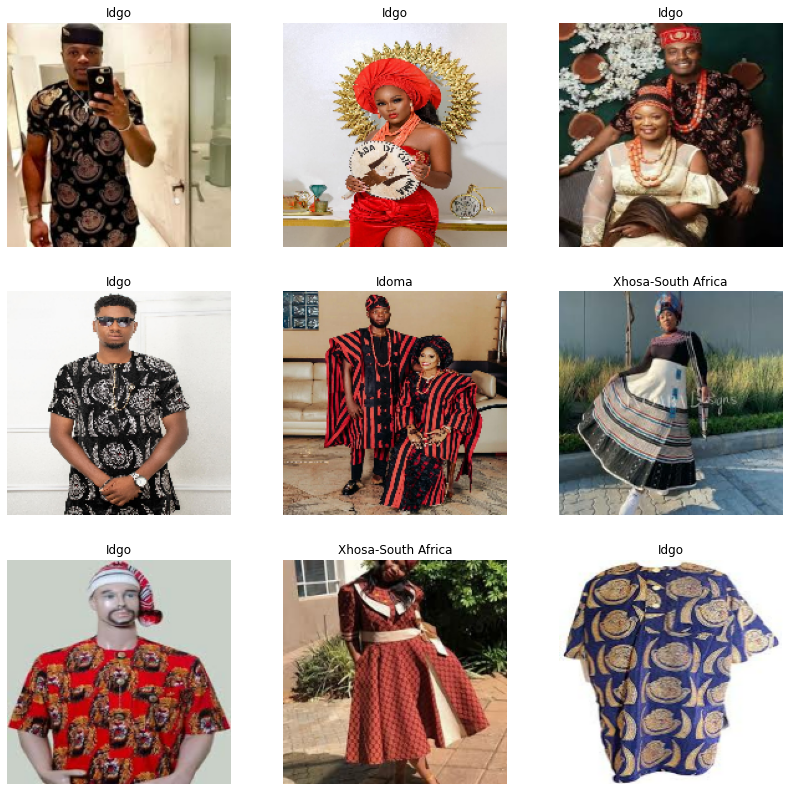

In [ ]:
import matplotlib.pyplot as plt

#Lopping through the trainset for sample images 
plt.figure(figsize=(14, 14))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Model Training

In [ ]:
num_classes = 8 #number of classes is number of image directory

# Define Sequential model with 3 layers
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
#Setting the training parameters
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10 #setting the number of passes in the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


306/306 [==============================] - 498s 2s/step - loss: 1.2685 - accuracy: 0.5346 - val_loss: 3.3806 - val_accuracy: 0.2602
Epoch 2/10
306/306 [==============================] - 56s 179ms/step - loss: 0.7726 - accuracy: 0.7296 - val_loss: 3.9734 - val_accuracy: 0.3695
Epoch 3/10
306/306 [==============================] - 56s 181ms/step - loss: 0.4911 - accuracy: 0.8325 - val_loss: 4.3418 - val_accuracy: 0.3808
Epoch 4/10
306/306 [==============================] - 56s 180ms/step - loss: 0.2632 - accuracy: 0.9153 - val_loss: 5.4616 - val_accuracy: 0.4102
Epoch 5/10
306/306 [==============================] - 57s 183ms/step - loss: 0.1420 - accuracy: 0.9586 - val_loss: 6.2114 - val_accuracy: 0.4188
Epoch 6/10
306/306 [==============================] - 57s 183ms/step - loss: 0.0970 - accuracy: 0.9747 - val_loss: 7.2962 - val_accuracy: 0.4234
Epoch 7/10
306/306 [==============================] - 56s 181ms/step - loss: 0.0831 - accuracy: 0.9787 - val_loss: 6.9264 - val_accuracy: 0.412

Deployment

In [ ]:
#saving the model
tf.keras.models.save_model(model,'my_model.hdf5')